## Final Project Submission

Please fill out:
* Student name: Daniel Quillao
* Student pace: Self-paced
* Scheduled project review date/time: TBD
* Instructor name: Jeff Herman
* Blog post URL:

# 1. Obtain Data

In [278]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [279]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# 2. Scrub and Clean Data

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Check for erroneous values

In [281]:
# Preview the 5 most frequent entries from each column
for col in df.columns:
    try:
        print(col, df[col].value_counts()[:5])
    except:
        print(col, df[col].value_counts())
        # If there aren't 5+ unique values for a column the first print statement
        # will throw an error for an invalid idx slice
    print('\n') # Break up the output between columns

id 795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64


date 6/23/2014    142
6/25/2014    131
6/26/2014    131
7/8/2014     127
4/27/2015    126
Name: date, dtype: int64


price 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64


bedrooms 3    9824
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64


bathrooms 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
Name: bathrooms, dtype: int64


sqft_living 1300    138
1400    135
1440    133
1660    129
1010    129
Name: sqft_living, dtype: int64


sqft_lot 5000    358
6000    290
4000    251
7200    220
7500    119
Name: sqft_lot, dtype: 

Notes: sqft_basement change to float, update '?' values

In [282]:
# sqft_basement: check for instances of '?'
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
276.0         1
792.0         1
2500.0        1
65.0          1
1281.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [283]:
# Drop rows as it only accounts for 2% of the data
df = df.drop(df[df['sqft_basement']=='?'].index)

In [284]:
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'])

## Check for nulls

In [285]:
# Check sum of nulls
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2339
view               61
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3754
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Note: Check waterfront, view, and yr_renovated

In [286]:
# Get statistics
df[['waterfront', 'view', 'yr_renovated']].describe()

,waterfront,view,yr_renovated
count,18804.000000,21082.000000,17389.000000
mean,0.007552,0.233327,82.991949
std,0.086573,0.765066,398.481819
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1.000000,4.000000,2015.000000


In [287]:
null_list = ['waterfront', 'view', 'yr_renovated']

for feature in null_list:
    print(df[feature].value_counts())

0.0    18662
1.0      142
Name: waterfront, dtype: int64
0.0    19018
2.0      930
3.0      496
1.0      327
4.0      311
Name: view, dtype: int64
0.0       16666
2014.0       69
2003.0       31
2013.0       31
2007.0       30
          ...  
1953.0        1
1944.0        1
1934.0        1
1971.0        1
1959.0        1
Name: yr_renovated, Length: 69, dtype: int64


Notes:
- waterfront has 2339 null values
- view has 61 null values
- yr_renovated has 3754 null values
- The majority of the data is 0 for these features. Update null values to 0.

In [288]:
# Update null values to 0
df.fillna(0, inplace = True)

In [289]:
# Double-check for null values
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [290]:
# Check for duplicates
print(len(df[df.duplicated()]))

0


## Feature Engineering

Notes:
- yr_renovated: convert to binary {0: not renovated, 1: renovated}
- sqft_basement: convert to binary {0: no basement, 1: has basement}
- view: convert to binary {0: not viewed, 1: has been viewed}
- date and id: not useful, drop
- lat and long: should be categorical, however might be better to drop (i think zip code will be a similar/better feauture)
- bathrooms and bedrooms: round

In [291]:
# yr_renovated
df['yr_renovated'].value_counts()

0.0       20420
2014.0       69
2003.0       31
2013.0       31
2007.0       30
          ...  
1953.0        1
1944.0        1
1934.0        1
1971.0        1
1959.0        1
Name: yr_renovated, Length: 69, dtype: int64

In [292]:
# Create new column renovated
df['renovated'] = df['yr_renovated'].map(lambda x: 1 if x > 0 else 0)
# Drop yr_renovated column
df = df.drop('yr_renovated', axis=1)

In [293]:
# Check new column
df['renovated'].value_counts()

0    20420
1      723
Name: renovated, dtype: int64

In [294]:
# sqft_basement
df['sqft_basement'].value_counts()

0.0       12826
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [295]:
# Create new column basement
df['basement'] = df['sqft_basement'].map(lambda x: 1 if x > 0 else 0)
# Drop sqft_basement column
df = df.drop('sqft_basement', axis=1)

In [296]:
# Check new column
df['basement'].value_counts()

0    12826
1     8317
Name: basement, dtype: int64

In [297]:
# view
df['view'].value_counts()

0.0    19079
2.0      930
3.0      496
1.0      327
4.0      311
Name: view, dtype: int64

In [298]:
# Update view
df['view'] = df['view'].map(lambda x: 1 if x > 0 else 0)

In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21143 non-null  int64  
 1   date           21143 non-null  object 
 2   price          21143 non-null  float64
 3   bedrooms       21143 non-null  int64  
 4   bathrooms      21143 non-null  float64
 5   sqft_living    21143 non-null  int64  
 6   sqft_lot       21143 non-null  int64  
 7   floors         21143 non-null  float64
 8   waterfront     21143 non-null  float64
 9   view           21143 non-null  int64  
 10  condition      21143 non-null  int64  
 11  grade          21143 non-null  int64  
 12  sqft_above     21143 non-null  int64  
 13  yr_built       21143 non-null  int64  
 14  zipcode        21143 non-null  int64  
 15  lat            21143 non-null  float64
 16  long           21143 non-null  float64
 17  sqft_living15  21143 non-null  int64  
 18  sqft_l

In [300]:
# Drop: 
# id: not useful, drop
# lat and long: should be categorical, drop (i think zip code will be a similar/better feauture)
df.drop(columns=['date', 'id', 'lat', 'long'], inplace=True) 

In [301]:
# cols to round
cols = ['bedrooms', 'bathrooms', 'floors']

df[cols] = df[cols].round(0)
df[cols]

,bedrooms,bathrooms,floors
0,3,1.0,1.0
1,3,2.0,2.0
2,2,1.0,1.0
3,4,3.0,1.0
4,3,2.0,1.0
...,...,...,...
21592,3,2.0,3.0
21593,4,2.0,2.0
21594,2,1.0,2.0
21595,3,2.0,2.0


In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21143 non-null  float64
 1   bedrooms       21143 non-null  int64  
 2   bathrooms      21143 non-null  float64
 3   sqft_living    21143 non-null  int64  
 4   sqft_lot       21143 non-null  int64  
 5   floors         21143 non-null  float64
 6   waterfront     21143 non-null  float64
 7   view           21143 non-null  int64  
 8   condition      21143 non-null  int64  
 9   grade          21143 non-null  int64  
 10  sqft_above     21143 non-null  int64  
 11  yr_built       21143 non-null  int64  
 12  zipcode        21143 non-null  int64  
 13  sqft_living15  21143 non-null  int64  
 14  sqft_lot15     21143 non-null  int64  
 15  renovated      21143 non-null  int64  
 16  basement       21143 non-null  int64  
dtypes: float64(4), int64(13)
memory usage: 2.9 MB


In [303]:
df['bathrooms'] = df.bathrooms.astype(int)
df['floors'] = df.floors.astype(int)
df['waterfront'] = df.waterfront.astype(int)

## Check for outliers

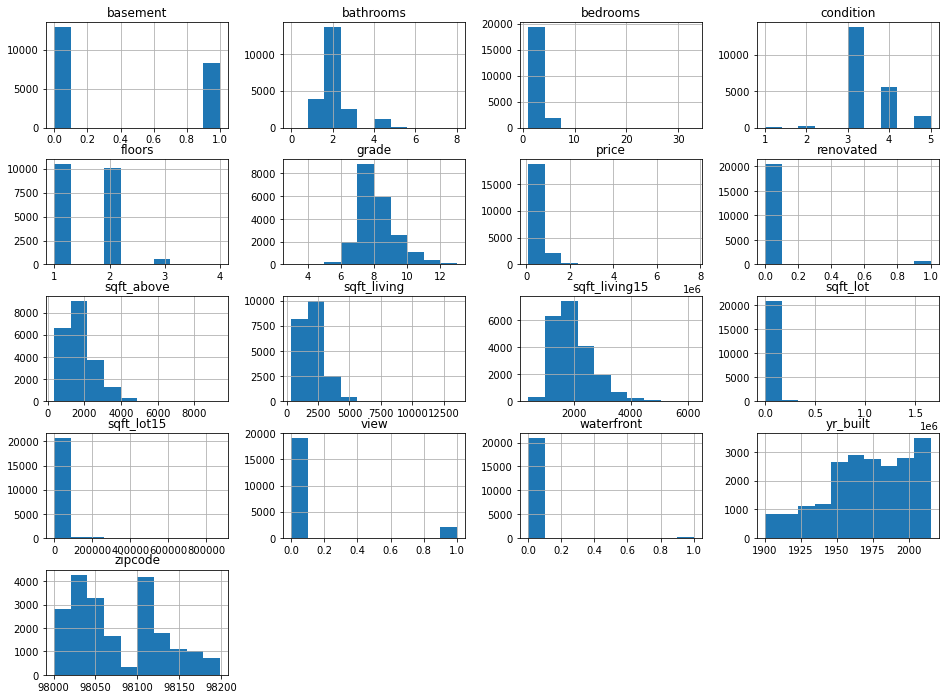

In [304]:
df.hist(figsize=(16, 12));

Notes: Look at bathrooms, bedrooms, price, sqft features

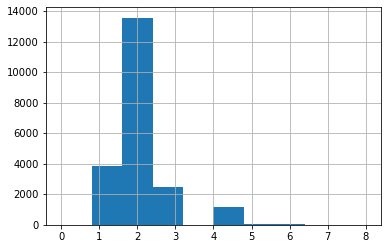

In [305]:
# bathrooms
df['bathrooms'].hist();

In [306]:
for i in range(90,100):
    q = i/100
    print("{} percentile: {}".format(q, df.bathrooms.quantile(q=q)))

0.9 percentile: 3.0
0.91 percentile: 3.0
0.92 percentile: 3.0
0.93 percentile: 3.0
0.94 percentile: 3.0
0.95 percentile: 4.0
0.96 percentile: 4.0
0.97 percentile: 4.0
0.98 percentile: 4.0
0.99 percentile: 4.0


In [307]:
df['bathrooms'].value_counts()

2    13568
1     3837
3     2470
4     1181
5       55
6       23
8        4
0        3
7        2
Name: bathrooms, dtype: int64

In [308]:
# Set limit to 4
df = df[df['bathrooms']<=4]

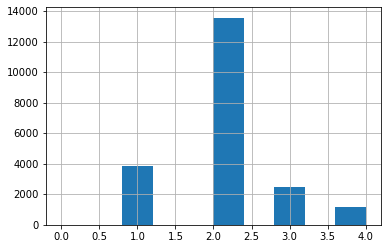

In [309]:
# bathrooms
df['bathrooms'].hist();

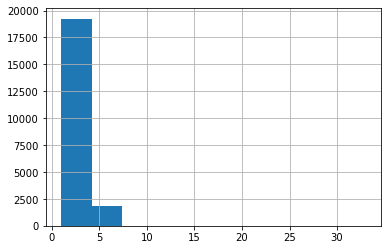

In [310]:
# bedrooms
df['bedrooms'].hist();

In [311]:
df['bedrooms'].value_counts()

3     9639
4     6716
2     2691
5     1525
6      247
1      191
7       30
8       11
9        5
10       2
11       1
33       1
Name: bedrooms, dtype: int64

In [312]:
for i in range(90,100):
    q = i/100
    print("{} percentile: {}".format(q, df.bedrooms.quantile(q=q)))

0.9 percentile: 4.0
0.91 percentile: 4.0
0.92 percentile: 5.0
0.93 percentile: 5.0
0.94 percentile: 5.0
0.95 percentile: 5.0
0.96 percentile: 5.0
0.97 percentile: 5.0
0.98 percentile: 5.0
0.99 percentile: 6.0


In [313]:
# Set limit to 12
df = df[df['bedrooms']<=5]

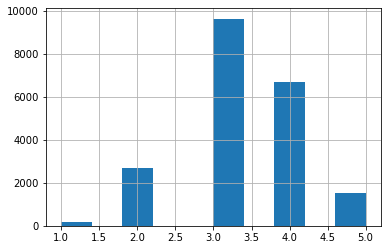

In [314]:
df['bedrooms'].hist()

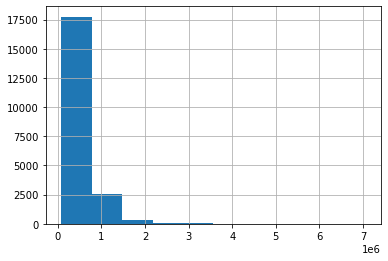

In [315]:
# price
df.price.hist();

In [316]:
df.price.value_counts()

350000.0    166
450000.0    163
550000.0    153
500000.0    149
425000.0    146
           ... 
575700.0      1
641200.0      1
739500.0      1
418900.0      1
884744.0      1
Name: price, Length: 3538, dtype: int64

In [317]:
for i in range(90,100):
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))

0.9 percentile: 872500.0
0.91 percentile: 900000.0
0.92 percentile: 935000.0
0.93 percentile: 975000.0
0.94 percentile: 1030000.0
0.95 percentile: 1110000.0
0.96 percentile: 1220000.0
0.97 percentile: 1340000.0
0.98 percentile: 1547799.9999999884
0.99 percentile: 1870000.0


In [318]:
# Set limit to 12
df = df[df['price']<=1300000]

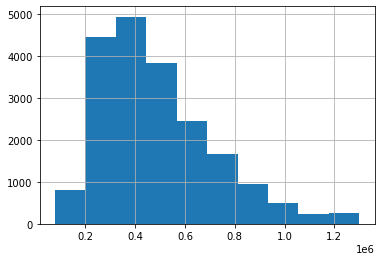

In [319]:
df.price.hist();

In [320]:
# Sqft features
sqft_feats = ['sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'sqft_above']

# Removes feats with z-score above 3 for specific columns
# Reference https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame
for feat in sqft_feats:
    df = df[np.abs(df[feat]-df[feat].mean()) <= (3*df[feat].std())]

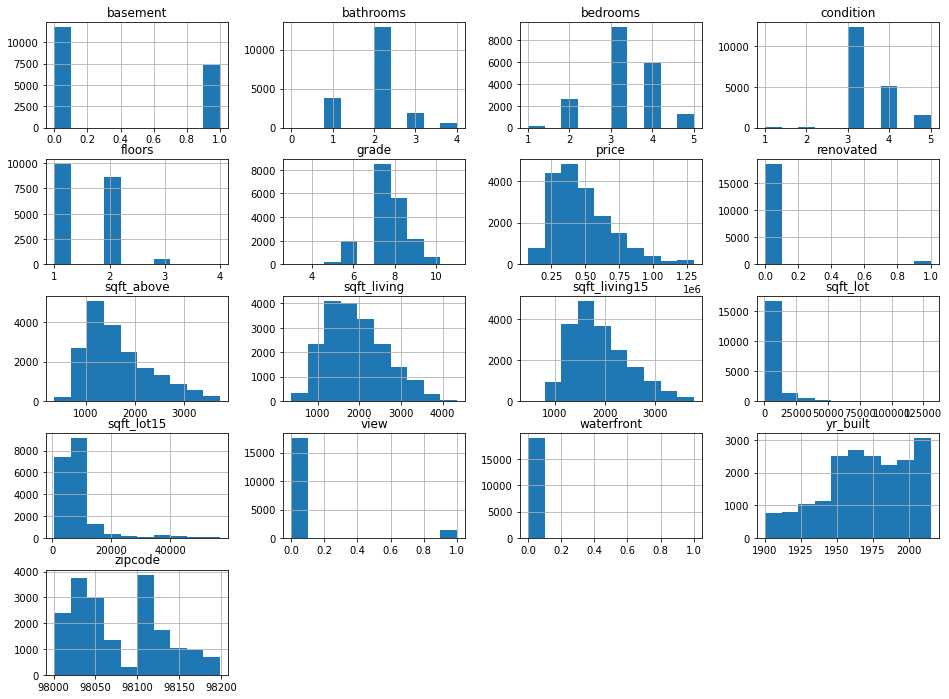

In [321]:
df.hist(figsize=(16,12));

## Normalize Continuous Features

In [322]:
# Log transform to reduce skewness
# Don't bother to normalize the price as this is the feature we will be predicting
# Remember that you can't take the logarithm of zero nor a negative number = N/A
continuous_feats = ['sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'sqft_above']
for var in continuous_feats:
    df[var]= np.log(df[var])

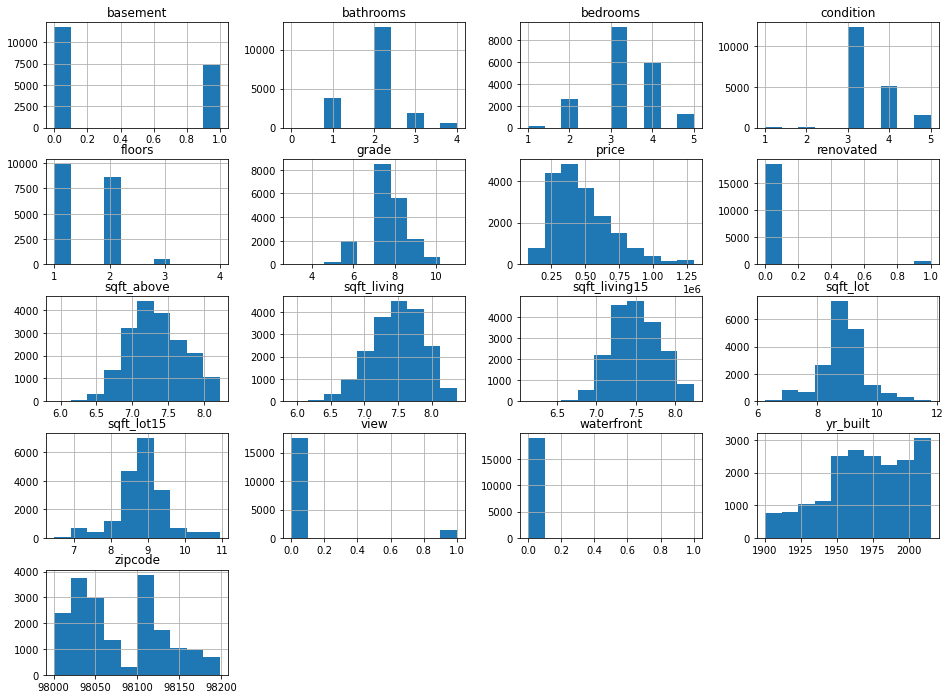

In [323]:
df.hist(figsize = (16,12));

In [324]:
# Standardization (z-score normalization)
# x' will have mean  𝜇=0  and  𝜎=1 
# Note that standardization does not make data moew normal, it will just change the mean and the standard error!

for var in continuous_feats:
    df[var] = (df[var] - df[var].mean()) / df[var].std()

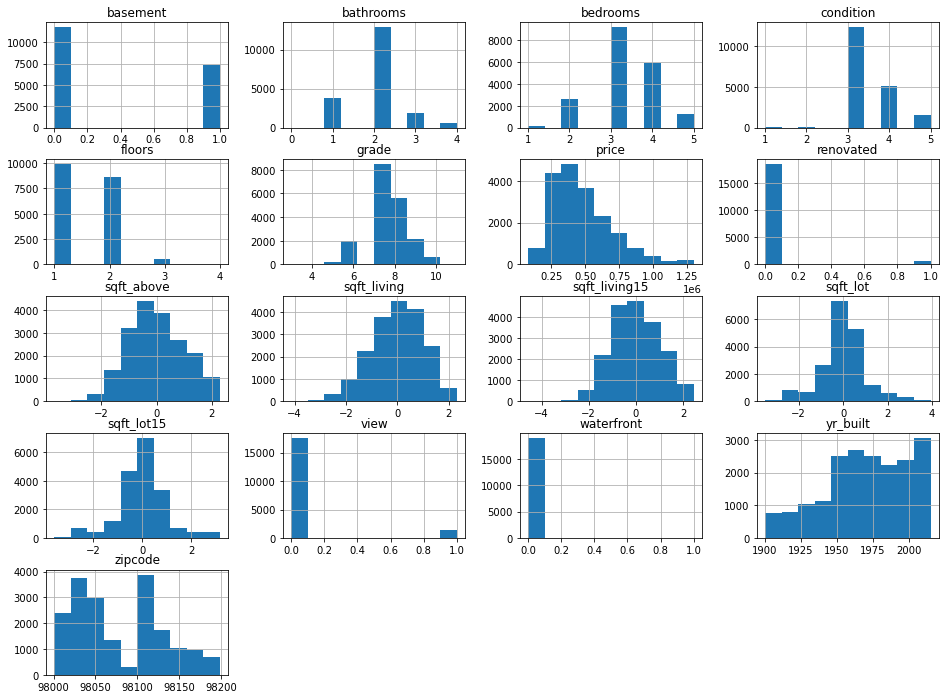

In [325]:
df.hist(figsize = (16, 12));

# Explore Data

## Check for linearity

/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warning

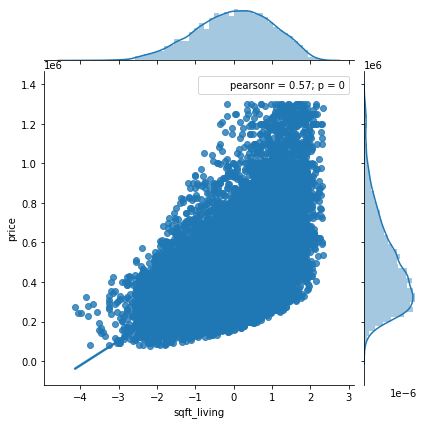

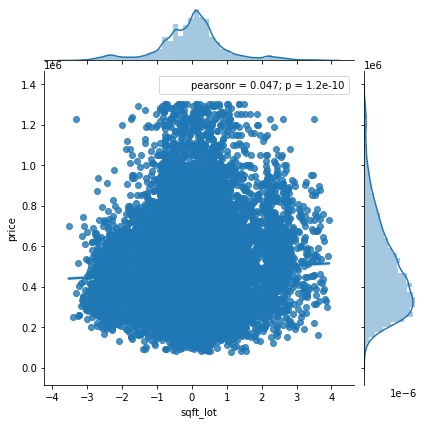

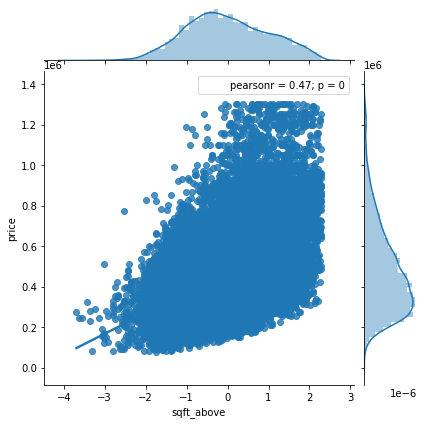

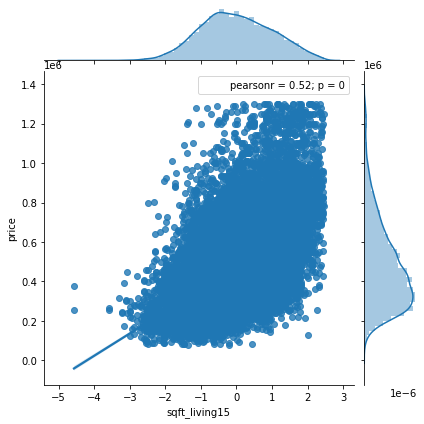

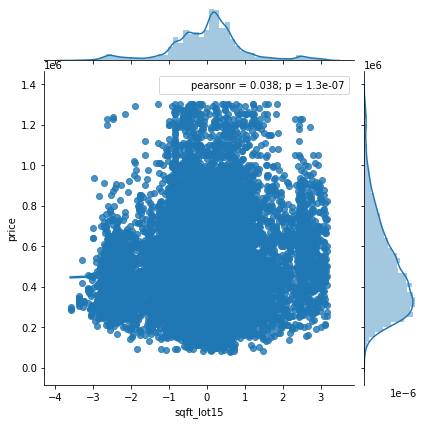

In [326]:
# Plot joint plots
continuous_feats = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']

for feat in continuous_feats:
    j = sns.jointplot(x = df[feat], y = df['price'], kind = 'reg')
    j.annotate(stats.pearsonr)

Note: sqft_living has the best linear relationship with price

## Check for multicollinearity

In [327]:
corr = df.corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15,renovated,basement
price,1.000000,0.284958,0.396526,0.572219,0.046556,0.255797,0.073167,0.269675,0.065387,0.609753,0.473713,0.014280,0.003982,0.521413,0.038201,0.098343,0.198032
bedrooms,0.284958,1.000000,0.451619,0.639291,0.218345,0.166886,-0.032957,0.038834,0.030893,0.343544,0.521722,0.185554,-0.170214,0.415146,0.203455,-0.005121,0.146443
bathrooms,0.396526,0.451619,1.000000,0.624024,-0.004973,0.310393,-0.007996,0.113348,-0.052083,0.499648,0.503354,0.393726,-0.131119,0.422063,-0.005736,0.044864,0.235286
sqft_living,0.572219,0.639291,0.624024,1.000000,0.267917,0.311809,0.001376,0.159641,-0.040874,0.682818,0.834233,0.350858,-0.209722,0.714534,0.248892,0.026873,0.238540
sqft_lot,0.046556,0.218345,-0.004973,0.267917,1.000000,-0.350833,0.051539,0.067898,0.121323,0.072334,0.244999,-0.083879,-0.259724,0.329466,0.910813,0.009954,-0.044557
floors,0.255797,0.166886,0.310393,0.311809,-0.350833,1.000000,-0.001965,-0.020588,-0.228432,0.403692,0.511592,0.390699,-0.020234,0.208383,-0.343521,0.005919,-0.269899
waterfront,0.073167,-0.032957,-0.007996,0.001376,0.051539,-0.001965,1.000000,0.180719,0.012203,-0.005431,-0.008164,-0.035512,0.048947,0.019309,0.062218,0.067196,0.015365
view,0.269675,0.038834,0.113348,0.159641,0.067898,-0.020588,0.180719,1.000000,0.045086,0.138701,0.062928,-0.087484,0.122748,0.198501,0.066234,0.057871,0.171256
condition,0.065387,0.030893,-0.052083,-0.040874,0.121323,-0.228432,0.012203,0.045086,1.000000,-0.157265,-0.150319,-0.353549,-0.009139,-0.091013,0.126690,-0.055787,0.128170
grade,0.609753,0.343544,0.499648,0.682818,0.072334,0.403692,-0.005431,0.138701,-0.157265,1.000000,0.687140,0.475580,-0.172934,0.633546,0.086267,-0.004116,0.030138


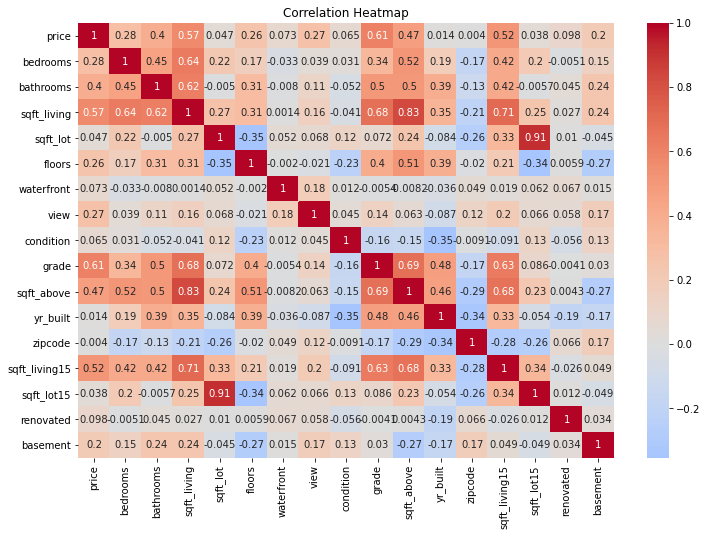

In [328]:
# Plot heatmap
plt.figure(figsize = (12,8))
sns.heatmap(corr, center = 0, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [329]:
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15,renovated,basement
price,1.000000,0.284958,0.396526,0.572219,0.046556,0.255797,0.073167,0.269675,0.065387,0.609753,0.473713,0.014280,0.003982,0.521413,0.038201,0.098343,0.198032
bedrooms,0.284958,1.000000,0.451619,0.639291,0.218345,0.166886,-0.032957,0.038834,0.030893,0.343544,0.521722,0.185554,-0.170214,0.415146,0.203455,-0.005121,0.146443
bathrooms,0.396526,0.451619,1.000000,0.624024,-0.004973,0.310393,-0.007996,0.113348,-0.052083,0.499648,0.503354,0.393726,-0.131119,0.422063,-0.005736,0.044864,0.235286
sqft_living,0.572219,0.639291,0.624024,1.000000,0.267917,0.311809,0.001376,0.159641,-0.040874,0.682818,0.834233,0.350858,-0.209722,0.714534,0.248892,0.026873,0.238540
sqft_lot,0.046556,0.218345,-0.004973,0.267917,1.000000,-0.350833,0.051539,0.067898,0.121323,0.072334,0.244999,-0.083879,-0.259724,0.329466,0.910813,0.009954,-0.044557
floors,0.255797,0.166886,0.310393,0.311809,-0.350833,1.000000,-0.001965,-0.020588,-0.228432,0.403692,0.511592,0.390699,-0.020234,0.208383,-0.343521,0.005919,-0.269899
waterfront,0.073167,-0.032957,-0.007996,0.001376,0.051539,-0.001965,1.000000,0.180719,0.012203,-0.005431,-0.008164,-0.035512,0.048947,0.019309,0.062218,0.067196,0.015365
view,0.269675,0.038834,0.113348,0.159641,0.067898,-0.020588,0.180719,1.000000,0.045086,0.138701,0.062928,-0.087484,0.122748,0.198501,0.066234,0.057871,0.171256
condition,0.065387,0.030893,-0.052083,-0.040874,0.121323,-0.228432,0.012203,0.045086,1.000000,-0.157265,-0.150319,-0.353549,-0.009139,-0.091013,0.126690,-0.055787,0.128170
grade,0.609753,0.343544,0.499648,0.682818,0.072334,0.403692,-0.005431,0.138701,-0.157265,1.000000,0.687140,0.475580,-0.172934,0.633546,0.086267,-0.004116,0.030138


In [330]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df_abs = corr.abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df_abs['pairs'] = list(zip(df_abs.level_0, df_abs.level_1))

# set index to pairs
df_abs.set_index(['pairs'], inplace = True)

#d rop level columns
df_abs.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df_abs.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df_abs.drop_duplicates(inplace=True)

In [331]:
abs(df.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15,renovated,basement
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [332]:
df_abs[(df_abs.cc>.75) & (df_abs.cc <1)]

,cc
pairs,
"(sqft_lot, sqft_lot15)",0.910813
"(sqft_living, sqft_above)",0.834233


In [333]:
df.drop(columns=['sqft_above', 'sqft_living15', 'sqft_lot15'], inplace=True) 

In [334]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'yr_built', 'zipcode',
       'renovated', 'basement'],
      dtype='object')

In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19078 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        19078 non-null  float64
 1   bedrooms     19078 non-null  int64  
 2   bathrooms    19078 non-null  int64  
 3   sqft_living  19078 non-null  float64
 4   sqft_lot     19078 non-null  float64
 5   floors       19078 non-null  int64  
 6   waterfront   19078 non-null  int64  
 7   view         19078 non-null  int64  
 8   condition    19078 non-null  int64  
 9   grade        19078 non-null  int64  
 10  yr_built     19078 non-null  int64  
 11  zipcode      19078 non-null  int64  
 12  renovated    19078 non-null  int64  
 13  basement     19078 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.2 MB


## Save Results

In [336]:
df.to_csv("df_cleaned.csv", index=False)

## One-hot encode Categorical Features

In [337]:
categorical_feats = ['basement', 'bathrooms', 'bedrooms', 'condition', 'floors', 'grade', 'renovated', 'view', 'waterfront', 'yr_built', 'zipcode']

# Convert to str
for col in categorical_feats:
    df[col] = df[col].astype('str')   

In [338]:
df = pd.get_dummies(df, drop_first = True)

In [339]:
df.head()

,price,sqft_living,sqft_lot,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bathrooms_1,bathrooms_2,bathrooms_3,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
0,221900.0,-1.094025,-0.304754,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,538000.0,0.945783,0.029881,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
2,180000.0,-2.212679,0.464870,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,0.235717,-0.469506,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,510000.0,-0.168241,0.177481,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


Note: This is a lot of columns.

# Model Data

## Model 1: All available features

To start, perform a train-test split and create an initial regression model to model the price using all of your available features.

Note: In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.
If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)", then you need to further preprocess your column names.

In [340]:
subs = [(' ', '_'),('.',''),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

In [341]:
df.columns = [col_formatting(col) for col in df.columns]

In [342]:
list(df.columns)

['price',
 'sqft_living',
 'sqft_lot',
 'bedrooms_2',
 'bedrooms_3',
 'bedrooms_4',
 'bedrooms_5',
 'bathrooms_1',
 'bathrooms_2',
 'bathrooms_3',
 'bathrooms_4',
 'floors_2',
 'floors_3',
 'floors_4',
 'waterfront_1',
 'view_1',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_11',
 'grade_3',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'yr_built_1901',
 'yr_built_1902',
 'yr_built_1903',
 'yr_built_1904',
 'yr_built_1905',
 'yr_built_1906',
 'yr_built_1907',
 'yr_built_1908',
 'yr_built_1909',
 'yr_built_1910',
 'yr_built_1911',
 'yr_built_1912',
 'yr_built_1913',
 'yr_built_1914',
 'yr_built_1915',
 'yr_built_1916',
 'yr_built_1917',
 'yr_built_1918',
 'yr_built_1919',
 'yr_built_1920',
 'yr_built_1921',
 'yr_built_1922',
 'yr_built_1923',
 'yr_built_1924',
 'yr_built_1925',
 'yr_built_1926',
 'yr_built_1927',
 'yr_built_1928',
 'yr_built_1929',
 'yr_built_1930',
 'yr_built_1931',
 'yr_built_1932',
 'yr_built_1933',
 'yr_built_1934

In [343]:
# Defining the problem
outcome = 'price'
x_cols = list(df.columns)
x_cols.remove(outcome)

In [344]:
train, test = train_test_split(df)

In [345]:
print(len(train), len(test))
train.head()

14308 4770


,price,sqft_living,sqft_lot,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bathrooms_1,bathrooms_2,bathrooms_3,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
3606,610000.0,0.366119,0.306719,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7060,499950.0,0.055873,-1.158109,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
18363,323000.0,-0.106579,0.005084,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5945,204995.0,-1.607582,0.194886,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10023,665000.0,0.632024,-0.882708,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [346]:
test.head()

,price,sqft_living,sqft_lot,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bathrooms_1,bathrooms_2,bathrooms_3,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
2501,575000.0,-0.329061,0.048734,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
14691,315000.0,-1.028233,-0.688585,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1272,320000.0,0.654911,0.710643,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
13532,896000.0,1.799699,2.540765,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
12023,415000.0,-0.379297,-0.686366,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [347]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     332.6
Date:                Tue, 16 Mar 2021   Prob (F-statistic):               0.00
Time:                        21:39:59   Log-Likelihood:            -1.8322e+05
No. Observations:               14308   AIC:                         3.669e+05
Df Residuals:                   14094   BIC:                         3.685e+05
Df Model:                         213                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.499e+05   5.82e+04      6.017      0.000    2.36e+05    4.64e+05
sqft_living     7.54e+04   1605.375     46.968      0.000    7.23e+04    7.85e+04
sqft_lot       2.574e+04   1293.385     19.902      0.000    2.32e+04    2.83e+04
bedrooms_2    -1.377e+04   8452.997     -1.629      0.103   -3.03e+04    2795.156
bedrooms_3    -1.353e+04   8561.868     -1.580      0.114   -3.03e+04    3250.597
bedrooms_4    -1.467e+04   8812.534     -1.664      0.096   -3.19e+04    2607.236
bedrooms_5     -2.22e+04   9346.825     -2.375      0.018   -4.05e+04   -3875.408
bathrooms_1    5.087e+04   5.18e+04      0.983      0.326   -5.06e+04    1.52e+05
bathrooms_2    4.152e+04   5.18e+04      0.801      0.423   -6.01e+04    1.43e+05
bathrooms_3    6.344e+04   5.19e+04      1.222      0.222   -3.83e+04    1.65e+05
bathrooms_4     8.07e+04   5.21e+04      1.550      0.121   -2.14e+04    1.83e+05
floors_2      -1115.3155   2367.356     -0.471      0.638   -5755.647    3525.016
floors_3       -4.15e+04   5789.914     -7.168      0.000   -5.29e+04   -3.02e+04
floors_4      -5.339e+04   4.01e+04     -1.332      0.183   -1.32e+05    2.52e+04
waterfront_1    2.55e+05   1.49e+04     17.154      0.000    2.26e+05    2.84e+05
view_1         9.318e+04   3090.340     30.152      0.000    8.71e+04    9.92e+04
condition_2    6.246e+04   2.23e+04      2.795      0.005    1.87e+04    1.06e+05
condition_3    8.665e+04   2.08e+04      4.160      0.000    4.58e+04    1.27e+05
condition_4    1.089e+05   2.08e+04      5.223      0.000     6.8e+04     1.5e+05
condition_5    1.437e+05    2.1e+04      6.852      0.000    1.03e+05    1.85e+05
grade_11       9.516e+04   1.36e+04      6.990      0.000    6.85e+04    1.22e+05
grade_3       -4.623e+04   9.04e+04     -0.511      0.609   -2.23e+05    1.31e+05
grade_4       -1.907e+05   2.22e+04     -8.577      0.000   -2.34e+05   -1.47e+05
grade_5       -2.272e+05   9623.939    -23.606      0.000   -2.46e+05   -2.08e+05
grade_6       -2.303e+05   6236.638    -36.921      0.000   -2.42e+05   -2.18e+05
grade_7       -2.097e+05   5226.220    -40.128      0.000    -2.2e+05   -1.99e+05
grade_8       -1.624e+05   4842.275    -33.543      0.000   -1.72e+05   -1.53e+05
grade_9       -7.338e+04   4887.011    -15.016      0.000    -8.3e+04   -6.38e+04
yr_built_1901 -4.903e+04   2.33e+04     -2.105      0.035   -9.47e+04   -3383.954
yr_built_1902 -1.452e+04   2.88e+04     -0.505      0.614   -7.09e+04    4.19e+04
yr_built_1903 -1.173e+04   2.05e+04     -0.573      0.567   -5.18e+04    2.84e+04
yr_built_1904 -4063.7182   2.05e+04     -0.198      0.843   -4.42e+04    3.61e+04
yr_built_1905  1.493e+04   1.88e+04      0.796      0.426   -2.19e+04    5.17e+04
yr_built_1906  6292.8970   1.68e+04      0.375      0.708   -2.66e+04    3.92e+04
yr_built_1907  8634.9235   1.82e+04      0.473   

## Remove the Uninfluential Features

In [348]:
# Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

214 113
['sqft_living', 'sqft_lot', 'bedrooms_5', 'floors_3', 'waterfront_1']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,3.499e+05,5.82e+04,6.017,0.000,2.36e+05,4.64e+05
sqft_living,7.54e+04,1605.375,46.968,0.000,7.23e+04,7.85e+04
sqft_lot,2.574e+04,1293.385,19.902,0.000,2.32e+04,2.83e+04
bedrooms_2,-1.377e+04,8452.997,-1.629,0.103,-3.03e+04,2795.156
bedrooms_3,-1.353e+04,8561.868,-1.580,0.114,-3.03e+04,3250.597


In [349]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     613.0
Date:                Tue, 16 Mar 2021   Prob (F-statistic):               0.00
Time:                        21:39:59   Log-Likelihood:            -1.8340e+05
No. Observations:               14308   AIC:                         3.670e+05
Df Residuals:                   14194   BIC:                         3.679e+05
Df Model:                         113                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.844e+05   2.16e+04     17.837      0.000    3.42e+05    4.27e+05
sqft_living    7.661e+04   1229.185     62.326      0.000    7.42e+04     7.9e+04
sqft_lot       2.408e+04   1081.056     22.274      0.000     2.2e+04    2.62e+04
bedrooms_5     -950.0916   3248.656     -0.292      0.770   -7317.884    5417.701
floors_3      -4.559e+04   5081.585     -8.971      0.000   -5.55e+04   -3.56e+04
waterfront_1   2.552e+05   1.49e+04     17.106      0.000    2.26e+05    2.84e+05
view_1          9.45e+04   3073.808     30.745      0.000    8.85e+04    1.01e+05
condition_2    5.231e+04   2.24e+04      2.338      0.019    8451.746    9.62e+04
condition_3    7.455e+04   2.09e+04      3.572      0.000    3.36e+04    1.15e+05
condition_4    9.677e+04   2.09e+04      4.634      0.000    5.58e+04    1.38e+05
condition_5    1.329e+05    2.1e+04      6.333      0.000    9.18e+04    1.74e+05
grade_11       9.532e+04   1.37e+04      6.956      0.000    6.85e+04    1.22e+05
grade_4       -1.753e+05   2.18e+04     -8.054      0.000   -2.18e+05   -1.33e+05
grade_5       -2.205e+05   9257.900    -23.815      0.000   -2.39e+05   -2.02e+05
grade_6       -2.302e+05   5921.969    -38.868      0.000   -2.42e+05   -2.19e+05
grade_7       -2.164e+05   5029.130    -43.027      0.000   -2.26e+05   -2.07e+05
grade_8       -1.698e+05   4743.804    -35.797      0.000   -1.79e+05   -1.61e+05
grade_9       -7.662e+04   4863.701    -15.753      0.000   -8.62e+04   -6.71e+04
yr_built_1901 -4.558e+04   1.98e+04     -2.303      0.021   -8.44e+04   -6789.277
yr_built_1908 -6.856e+04   1.25e+04     -5.507      0.000    -9.3e+04   -4.42e+04
yr_built_1913  6.738e+04   1.68e+04      4.022      0.000    3.45e+04       1e+05
yr_built_1953 -1.963e+04   7624.657     -2.575      0.010   -3.46e+04   -4687.570
yr_built_1954 -1.928e+04   6327.231     -3.047      0.002   -3.17e+04   -6873.991
yr_built_1955 -2.248e+04   6641.806     -3.384      0.001   -3.55e+04   -9460.112
yr_built_1957  -2.91e+04   7644.272     -3.806      0.000   -4.41e+04   -1.41e+04
yr_built_1958 -1.859e+04   7165.640     -2.594      0.009   -3.26e+04   -4544.752
yr_built_1959 -2.383e+04   5940.071     -4.012      0.000   -3.55e+04   -1.22e+04
yr_built_1960 -2.032e+04   7101.688     -2.861      0.004   -3.42e+04   -6396.488
yr_built_1961 -1.898e+04   7393.796     -2.567      0.010   -3.35e+04   -4490.754
yr_built_1962 -2.302e+04   6363.691     -3.618      0.000   -3.55e+04   -1.05e+04
yr_built_1963 -2.052e+04   7192.252     -2.854      0.004   -3.46e+04   -6426.811
yr_built_1964  -2.85e+04   8770.446     -3.249      0.001   -4.57e+04   -1.13e+04
yr_built_1965 -3.664e+04   8480.101     -4.321      0.000   -5.33e+04      -2e+04
yr_built_1966 -3.026e+04   7225.052     -4.189      0.000   -4.44e+04   -1.61e+04
yr_built_1972 -2.316e+04   9189.882     -2.520   

Comment: You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extent of this problem.

In [350]:
# Your code here
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('sqft_living', 2.7272557842535017),
 ('sqft_lot', 2.0694673500496727),
 ('bedrooms_5', 1.1863067719636742),
 ('floors_3', 1.3500260310994576),
 ('waterfront_1', 1.0957430687088845),
 ('view_1', 1.2837455237713422),
 ('condition_2', 1.3824122954575526),
 ('condition_3', 30.219036118977854),
 ('condition_4', 13.820947285067469),
 ('condition_5', 4.959857138316788),
 ('grade_11', 1.1118627732173132),
 ('grade_4', 1.1120554668618752),
 ('grade_5', 1.6559482037430546),
 ('grade_6', 6.150772811575933),
 ('grade_7', 19.247809768111924),
 ('grade_8', 11.374968951643064),
 ('grade_9', 4.544155897616995),
 ('yr_built_1901', 1.0192997240735477),
 ('yr_built_1908', 1.0225753565546283),
 ('yr_built_1913', 1.0146101444332738),
 ('yr_built_1953', 1.0563446377303491),
 ('yr_built_1954', 1.0639495914376946),
 ('yr_built_1955', 1.0677737304061372),
 ('yr_built_1957', 1.0493620746002754),
 ('yr_built_1958', 1.0497232211361396),
 ('yr_built_1959', 1.0639657788688135),
 ('yr_built_1960', 1.05253298668123

## Perform Another Round of Feature Selection

In [351]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

113 108


In [352]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     545.9
Date:                Tue, 16 Mar 2021   Prob (F-statistic):               0.00
Time:                        21:40:12   Log-Likelihood:            -1.8434e+05
No. Observations:               14308   AIC:                         3.689e+05
Df Residuals:                   14199   BIC:                         3.697e+05
Df Model:                         108                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.733e+05   2682.854    101.888      0.000    2.68e+05    2.79e+05
sqft_living    9.911e+04   1089.337     90.978      0.000     9.7e+04    1.01e+05
sqft_lot       2.503e+04   1127.571     22.200      0.000    2.28e+04    2.72e+04
bedrooms_5    -1.042e+04   3458.218     -3.013      0.003   -1.72e+04   -3641.015
floors_3      -3.124e+04   5380.160     -5.807      0.000   -4.18e+04   -2.07e+04
waterfront_1   2.567e+05   1.59e+04     16.120      0.000    2.26e+05    2.88e+05
view_1         1.068e+05   3264.553     32.707      0.000       1e+05    1.13e+05
condition_2   -3.291e+04   9118.023     -3.610      0.000   -5.08e+04    -1.5e+04
condition_5    4.152e+04   3027.416     13.715      0.000    3.56e+04    4.75e+04
grade_11       2.198e+05   1.41e+04     15.552      0.000    1.92e+05    2.48e+05
grade_4         7.56e+04   2.23e+04      3.387      0.001    3.19e+04    1.19e+05
grade_5        1.268e+04   7890.943      1.606      0.108   -2791.967    2.81e+04
grade_9        7.777e+04   2868.807     27.108      0.000    7.21e+04    8.34e+04
yr_built_1901 -6.439e+04   2.11e+04     -3.049      0.002   -1.06e+05    -2.3e+04
yr_built_1908 -8.168e+04   1.33e+04     -6.147      0.000   -1.08e+05   -5.56e+04
yr_built_1913  6.542e+04   1.79e+04      3.658      0.000    3.04e+04       1e+05
yr_built_1953 -2.369e+04   8138.195     -2.910      0.004   -3.96e+04   -7733.692
yr_built_1954 -2.344e+04   6750.176     -3.472      0.001   -3.67e+04   -1.02e+04
yr_built_1955  -3.17e+04   7071.070     -4.483      0.000   -4.56e+04   -1.78e+04
yr_built_1957 -3.676e+04   8153.682     -4.508      0.000   -5.27e+04   -2.08e+04
yr_built_1958 -2.571e+04   7648.649     -3.361      0.001   -4.07e+04   -1.07e+04
yr_built_1959 -2.764e+04   6338.536     -4.360      0.000   -4.01e+04   -1.52e+04
yr_built_1960  -2.69e+04   7575.551     -3.551      0.000   -4.17e+04   -1.21e+04
yr_built_1961 -2.765e+04   7888.417     -3.506      0.000   -4.31e+04   -1.22e+04
yr_built_1962 -3.183e+04   6773.605     -4.698      0.000   -4.51e+04   -1.85e+04
yr_built_1963 -2.783e+04   7664.427     -3.631      0.000   -4.29e+04   -1.28e+04
yr_built_1964 -3.188e+04   9360.420     -3.406      0.001   -5.02e+04   -1.35e+04
yr_built_1965 -4.273e+04   9046.468     -4.723      0.000   -6.05e+04    -2.5e+04
yr_built_1966 -2.872e+04   7696.200     -3.731      0.000   -4.38e+04   -1.36e+04
yr_built_1972 -2.717e+04   9808.734     -2.770      0.006   -4.64e+04   -7942.881
yr_built_1974 -1.506e+04   8884.441     -1.695      0.090   -3.25e+04    2352.389
yr_built_1975 -3.198e+04   8502.115     -3.761      0.000   -4.86e+04   -1.53e+04
yr_built_1976 -1.319e+04   7397.446     -1.783      0.075   -2.77e+04    1310.202
yr_built_1977 -2.857e+04   5888.928     -4.852      0.000   -4.01e+04    -1.7e+04
yr_built_1978 -2.495e+04   6278.871     -3.974   

Note: There are still p_values > 0.05

## Remove Uninfluential features part 2

In [353]:
# Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

109 100
['sqft_living', 'sqft_lot', 'bedrooms_5', 'floors_3', 'waterfront_1']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,2.733e+05,2682.854,101.888,0.000,2.68e+05,2.79e+05
sqft_living,9.911e+04,1089.337,90.978,0.000,9.7e+04,1.01e+05
sqft_lot,2.503e+04,1127.571,22.200,0.000,2.28e+04,2.72e+04
bedrooms_5,-1.042e+04,3458.218,-3.013,0.003,-1.72e+04,-3641.015
floors_3,-3.124e+04,5380.160,-5.807,0.000,-4.18e+04,-2.07e+04


In [354]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     589.0
Date:                Tue, 16 Mar 2021   Prob (F-statistic):               0.00
Time:                        21:40:12   Log-Likelihood:            -1.8435e+05
No. Observations:               14308   AIC:                         3.689e+05
Df Residuals:                   14207   BIC:                         3.697e+05
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.715e+05   2620.360    103.631      0.000    2.66e+05    2.77e+05
sqft_living    9.863e+04   1067.381     92.408      0.000    9.65e+04    1.01e+05
sqft_lot       2.475e+04   1120.516     22.085      0.000    2.26e+04    2.69e+04
bedrooms_5    -9841.1900   3453.503     -2.850      0.004   -1.66e+04   -3071.873
floors_3      -3.173e+04   5379.249     -5.898      0.000   -4.23e+04   -2.12e+04
waterfront_1   2.577e+05   1.59e+04     16.189      0.000    2.27e+05    2.89e+05
view_1          1.07e+05   3264.685     32.787      0.000    1.01e+05    1.13e+05
condition_2   -3.163e+04   9104.474     -3.474      0.001   -4.95e+04   -1.38e+04
condition_5     4.19e+04   3025.131     13.850      0.000     3.6e+04    4.78e+04
grade_11       2.202e+05   1.41e+04     15.586      0.000    1.92e+05    2.48e+05
grade_4        7.572e+04   2.23e+04      3.395      0.001     3.2e+04    1.19e+05
grade_9        7.778e+04   2864.772     27.150      0.000    7.22e+04    8.34e+04
yr_built_1901 -6.343e+04   2.11e+04     -3.004      0.003   -1.05e+05    -2.2e+04
yr_built_1908 -8.105e+04   1.33e+04     -6.099      0.000   -1.07e+05    -5.5e+04
yr_built_1913  6.593e+04   1.79e+04      3.685      0.000    3.09e+04    1.01e+05
yr_built_1953 -2.273e+04   8136.712     -2.793      0.005   -3.87e+04   -6778.052
yr_built_1954 -2.261e+04   6744.142     -3.352      0.001   -3.58e+04   -9386.910
yr_built_1955  -3.08e+04   7061.324     -4.362      0.000   -4.46e+04    -1.7e+04
yr_built_1957 -3.565e+04   8145.082     -4.377      0.000   -5.16e+04   -1.97e+04
yr_built_1958 -2.444e+04   7636.921     -3.200      0.001   -3.94e+04   -9470.110
yr_built_1959 -2.642e+04   6324.600     -4.177      0.000   -3.88e+04    -1.4e+04
yr_built_1960 -2.557e+04   7562.207     -3.381      0.001   -4.04e+04   -1.07e+04
yr_built_1961  -2.62e+04   7875.796     -3.327      0.001   -4.16e+04   -1.08e+04
yr_built_1962 -3.039e+04   6755.960     -4.499      0.000   -4.36e+04   -1.72e+04
yr_built_1963 -2.628e+04   7650.647     -3.435      0.001   -4.13e+04   -1.13e+04
yr_built_1964 -3.037e+04   9350.506     -3.248      0.001   -4.87e+04    -1.2e+04
yr_built_1965  -4.12e+04   9036.262     -4.559      0.000   -5.89e+04   -2.35e+04
yr_built_1966 -2.714e+04   7680.928     -3.534      0.000   -4.22e+04   -1.21e+04
yr_built_1972 -2.561e+04   9797.738     -2.614      0.009   -4.48e+04   -6407.004
yr_built_1975 -3.012e+04   8484.479     -3.550      0.000   -4.68e+04   -1.35e+04
yr_built_1977 -2.661e+04   5859.561     -4.542      0.000   -3.81e+04   -1.51e+04
yr_built_1978 -2.294e+04   6251.482     -3.670      0.000   -3.52e+04   -1.07e+04
yr_built_1979 -2.455e+04   6378.579     -3.849      0.000   -3.71e+04    -1.2e+04
yr_built_1982 -2.487e+04    1.2e+04     -2.076      0.038   -4.84e+04   -1391.309
yr_built_1990 -1.451e+04   6698.690     -2.167   

# Check the Normality Assumption

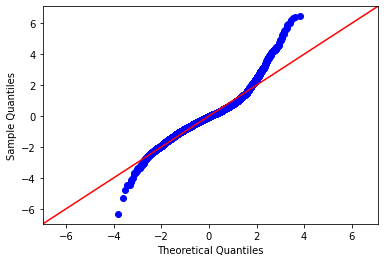

In [355]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

Note: There appears to be some issues with the residuals not being normally distributed.

# Check Homoscedasticity Assumption

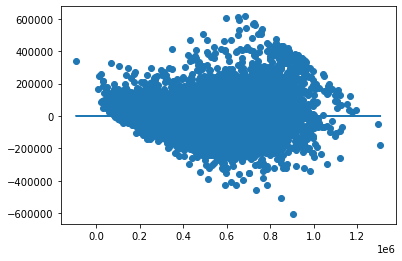

In [356]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

Note: Whilst not ideal, there is no strong evidence of heteroscedasticity. As such we might not need to consider a log transformation of the target variable.

## Evaluate Model using sci-kit learn's cross_val_score

In [357]:
# Define X_train and y_train. As single feature need to reshape X_train into column vector
X_train = train[x_cols]
y_train = train['price']

# Create linear regression object
linreg = LinearRegression()

# Fit on training data
linreg.fit(X_train, y_train)

scores = cross_val_score(
            linreg, 
            X_train,
            y_train,
            cv=10,
            scoring="neg_mean_squared_error"
)

rmse_scores = np.sqrt(-scores)
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([100287.66103534,  97521.79443079,  94382.78461344,  90541.86724234,
        94866.89700327,  96111.07824654,  99848.6248083 ,  98411.78198411,
        93403.54490695,  96622.55236263])

96199.8586633709

2859.3893740371677

We can interpret the RMSE as the mean error in USD, i.e. on average the actual price will be USD 97,000 more or less than our predicted price. The standard deviation of around USD 1900 is decent meaning our model doest not appear to be overfitting.

130 features

In [358]:
X_train.head()

,sqft_living,sqft_lot,bedrooms_5,floors_3,waterfront_1,view_1,condition_2,condition_5,grade_11,grade_4,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
3606,0.366119,0.306719,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7060,0.055873,-1.158109,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18363,-0.106579,0.005084,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5945,-1.607582,0.194886,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10023,0.632024,-0.882708,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


## Save model using pickle

# Model 2: Remove yr_built and zip code

In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19078 entries, 0 to 21596
Columns: 214 entries, price to basement_1
dtypes: float64(3), uint8(211)
memory usage: 4.4 MB


In [360]:
df.head()

,price,sqft_living,sqft_lot,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bathrooms_1,bathrooms_2,bathrooms_3,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
0,221900.0,-1.094025,-0.304754,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,538000.0,0.945783,0.029881,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
2,180000.0,-2.212679,0.464870,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,0.235717,-0.469506,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,510000.0,-0.168241,0.177481,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [361]:
list(df.columns)

['price',
 'sqft_living',
 'sqft_lot',
 'bedrooms_2',
 'bedrooms_3',
 'bedrooms_4',
 'bedrooms_5',
 'bathrooms_1',
 'bathrooms_2',
 'bathrooms_3',
 'bathrooms_4',
 'floors_2',
 'floors_3',
 'floors_4',
 'waterfront_1',
 'view_1',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_11',
 'grade_3',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'yr_built_1901',
 'yr_built_1902',
 'yr_built_1903',
 'yr_built_1904',
 'yr_built_1905',
 'yr_built_1906',
 'yr_built_1907',
 'yr_built_1908',
 'yr_built_1909',
 'yr_built_1910',
 'yr_built_1911',
 'yr_built_1912',
 'yr_built_1913',
 'yr_built_1914',
 'yr_built_1915',
 'yr_built_1916',
 'yr_built_1917',
 'yr_built_1918',
 'yr_built_1919',
 'yr_built_1920',
 'yr_built_1921',
 'yr_built_1922',
 'yr_built_1923',
 'yr_built_1924',
 'yr_built_1925',
 'yr_built_1926',
 'yr_built_1927',
 'yr_built_1928',
 'yr_built_1929',
 'yr_built_1930',
 'yr_built_1931',
 'yr_built_1932',
 'yr_built_1933',
 'yr_built_1934

In [362]:
model_2_df = df[['price',
 'sqft_living',
 'sqft_lot',
 'bedrooms_2',
 'bedrooms_3',
 'bedrooms_4',
 'bedrooms_5',
 'bathrooms_1',
 'bathrooms_2',
 'bathrooms_3',
 'bathrooms_4',
 'floors_2',
 'floors_3',
 'floors_4',
 'waterfront_1',
 'view_1',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_11',
 'grade_3',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
'renovated_1',
 'basement_1']]

In [363]:
model_2_df.head()

,price,sqft_living,sqft_lot,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bathrooms_1,bathrooms_2,bathrooms_3,...,grade_11,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,renovated_1,basement_1
0,221900.0,-1.094025,-0.304754,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,538000.0,0.945783,0.029881,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1
2,180000.0,-2.212679,0.464870,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,604000.0,0.235717,-0.469506,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4,510000.0,-0.168241,0.177481,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [364]:
# Defining the problem
outcome = 'price'
x_cols = list(model_2_df.columns)
x_cols.remove(outcome)

In [365]:
#train, test = train_test_split(model_2_df)

In [366]:
print(len(train), len(test))
train.head()

14308 4770


,price,sqft_living,sqft_lot,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bathrooms_1,bathrooms_2,bathrooms_3,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
3606,610000.0,0.366119,0.306719,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7060,499950.0,0.055873,-1.158109,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
18363,323000.0,-0.106579,0.005084,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5945,204995.0,-1.607582,0.194886,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10023,665000.0,0.632024,-0.882708,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [367]:
test.head()

,price,sqft_living,sqft_lot,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bathrooms_1,bathrooms_2,bathrooms_3,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
2501,575000.0,-0.329061,0.048734,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
14691,315000.0,-1.028233,-0.688585,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1272,320000.0,0.654911,0.710643,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
13532,896000.0,1.799699,2.540765,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
12023,415000.0,-0.379297,-0.686366,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [368]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     524.9
Date:                Tue, 16 Mar 2021   Prob (F-statistic):               0.00
Time:                        21:40:14   Log-Likelihood:            -1.9088e+05
No. Observations:               14308   AIC:                         3.818e+05
Df Residuals:                   14278   BIC:                         3.820e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     7.435e+05   9.49e+04      7.833      0.000    5.57e+05     9.3e+05
sqft_living   7.266e+04   2616.185     27.774      0.000    6.75e+04    7.78e+04
sqft_lot     -1.719e+04   1670.035    -10.296      0.000   -2.05e+04   -1.39e+04
bedrooms_2   -1.882e+04   1.41e+04     -1.331      0.183   -4.65e+04    8895.468
bedrooms_3   -6.203e+04   1.43e+04     -4.346      0.000      -9e+04   -3.41e+04
bedrooms_4     -6.6e+04   1.47e+04     -4.498      0.000   -9.48e+04   -3.72e+04
bedrooms_5   -5.478e+04   1.56e+04     -3.522      0.000   -8.53e+04   -2.43e+04
bathrooms_1   7.832e+04   8.72e+04      0.898      0.369   -9.27e+04    2.49e+05
bathrooms_2   2.601e+04   8.73e+04      0.298      0.766   -1.45e+05    1.97e+05
bathrooms_3   4.431e+04   8.74e+04      0.507      0.612   -1.27e+05    2.16e+05
bathrooms_4   6.338e+04   8.77e+04      0.723      0.470   -1.09e+05    2.35e+05
floors_2      1.803e+04   3509.428      5.137      0.000    1.11e+04    2.49e+04
floors_3       3.71e+04   8941.530      4.150      0.000    1.96e+04    5.46e+04
floors_4      2.897e+04   6.77e+04      0.428      0.668   -1.04e+05    1.62e+05
waterfront_1  1.572e+05   2.42e+04      6.504      0.000     1.1e+05    2.05e+05
view_1        9.885e+04   5012.703     19.719      0.000     8.9e+04    1.09e+05
condition_2  -3.778e+04   3.75e+04     -1.008      0.314   -1.11e+05    3.57e+04
condition_3  -3.493e+04   3.49e+04     -1.000      0.317   -1.03e+05    3.36e+04
condition_4   1.843e+04    3.5e+04      0.527      0.598   -5.01e+04     8.7e+04
condition_5   7.511e+04   3.52e+04      2.135      0.033    6161.745    1.44e+05
grade_11      1.155e+05   2.29e+04      5.047      0.000    7.06e+04     1.6e+05
grade_3      -3.854e+05   1.52e+05     -2.539      0.011   -6.83e+05   -8.79e+04
grade_4          -4e+05   3.68e+04    -10.863      0.000   -4.72e+05   -3.28e+05
grade_5      -4.126e+05   1.53e+04    -26.902      0.000   -4.43e+05   -3.82e+05
grade_6      -3.914e+05   9621.877    -40.677      0.000    -4.1e+05   -3.73e+05
grade_7      -3.314e+05   8245.729    -40.188      0.000   -3.48e+05   -3.15e+05
grade_8      -2.466e+05   7856.462    -31.384      0.000   -2.62e+05   -2.31e+05
grade_9      -1.081e+05   8092.007    -13.362      0.000   -1.24e+05   -9.23e+04
renovated_1   1.056e+05   7400.448     14.272      0.000    9.11e+04     1.2e+05
basement_1      4.4e+04   3194.116     13.777      0.000    3.77e+04    5.03e+04
==============================================================================
Omnibus:                     1345.830   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2222.409
Skew:                           0.685   Prob(JB):                         0.00
Kurtosis:                       4.360   Cond. No.                         274.
===============

## Perform stepwise selection

In [369]:
model_2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19078 entries, 0 to 21596
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         19078 non-null  float64
 1   sqft_living   19078 non-null  float64
 2   sqft_lot      19078 non-null  float64
 3   bedrooms_2    19078 non-null  uint8  
 4   bedrooms_3    19078 non-null  uint8  
 5   bedrooms_4    19078 non-null  uint8  
 6   bedrooms_5    19078 non-null  uint8  
 7   bathrooms_1   19078 non-null  uint8  
 8   bathrooms_2   19078 non-null  uint8  
 9   bathrooms_3   19078 non-null  uint8  
 10  bathrooms_4   19078 non-null  uint8  
 11  floors_2      19078 non-null  uint8  
 12  floors_3      19078 non-null  uint8  
 13  floors_4      19078 non-null  uint8  
 14  waterfront_1  19078 non-null  uint8  
 15  view_1        19078 non-null  uint8  
 16  condition_2   19078 non-null  uint8  
 17  condition_3   19078 non-null  uint8  
 18  condition_4   19078 non-nu

In [376]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward`-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [377]:
X = model_2_df.drop('price', axis=1)
y = model_2_df['price']

result = stepwise_selection(X, y, verbose = True)
print('resulting features:')
print(result)

<ipython-input-376-1dbdb72e687d>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  view_1                         with p-value 0.0
Add  floors_2                       with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  grade_9                        with p-value 1.70662e-173
Add  grade_7                        with p-value 6.60282e-94
Add  grade_6                        with p-value 3.94774e-102
Add  grade_8                        with p-value 5.23649e-116


ValueError: list.remove(x): x not in list

# Model 3 based off model 2

# Stepwise Selection

In [ ]:
y = np.asarray(model_2_df['price'])
X = model_2_df.drop(['price'], axis = 1)
predictors = sm.add_constant(X)

In [ ]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward`-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [375]:
result = stepwise_selection(predictors.astype(float), y.astype(float))
print('Features:')
print(result)

<ipython-input-370-2bf0a01d7b59>:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  view_1                         with p-value 0.0
Add  floors_2                       with p-value 0.0
Add  const                          with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  grade_9                        with p-value 1.70662e-173
Add  grade_7                        with p-value 6.60282e-94
Add  grade_6                        with p-value 3.94774e-102
Add  grade_8                        with p-value 5.23649e-116


ValueError: list.remove(x): x not in list

In [ ]:
print(len(result))

# Feature ranking with recursive feature elimination


Let us apply Recursive feature selection to see if we can reduce the number of features without sacrificing perfomance.

In [ ]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 20)
selector = selector.fit(X, y)

In [ ]:
selected_columns = X.columns[selector.support_]
selected_columns
rfe_list = selected_columns.tolist()

#Stepwise and RFE gives us different lists of predictors to include. Lets see which ones are different.
for item in result: 
    if item in(rfe_list):
        pass
    else:
        print(item)

RFE states that these are the least important features within the model. Let's first try with them and without them.

In [ ]:
type(result)

In [ ]:
result.remove('const')

In [ ]:
# Defining the problem
outcome = 'price'
x_cols = result

In [ ]:
train, test = train_test_split(df)

In [ ]:
print(len(train), len(test))
train.head()

In [ ]:
test.head()

In [ ]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

In [ ]:
predictors

# Model 4: remove RFE based off model 2

In [ ]:
rfe_list_to_remove = {'floors_2', 
'sqft_above', 
'condition_3',
'sqft_lot',
'bedrooms_2',
'condition_2',
'bedrooms_5'}

In [ ]:
result2 = [ele for ele in result if ele not in rfe_list_to_remove] 

In [ ]:
result2

In [ ]:
# Defining the problem
outcome = 'price'
x_cols = result2

In [ ]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()